## Determining stats and sample size

In [2]:
import statsmodels.stats.power as smp

effect_size = 0.5  # Medium effect size (Cohen's d = 0.5)
alpha = 0.05       # Probability of rejecting the null hypothesis, common choice for Type I error rate (FP)
power = 0.95       # Probability of correctly rejecting the null hypothesis, desired power, higher power reduces risk of Type II error (TP)

sample_size = smp.TTestIndPower().solve_power(effect_size=effect_size, power=power, alpha=alpha, ratio=1.0, alternative='two-sided')
print(f'Recommended number of runs per group: {int(sample_size)}')

Recommended number of runs per group: 104


## Generating a list of random seeds

In [2]:
import random

# Generate 4 random seeds, using my first seed as 777, a number I picked will be the seeds I use.
# [777, 8461, 9969, 4377, 3077] - is used for my experiment dataset runs
random_seeds = [777]
additional_seeds = [random.randint(0, 10000) for _ in range(4)]
random_seeds.extend(additional_seeds)

print(random_seeds)

[777, 3807, 4227, 6746, 8430]


## Collected data from experiment runs

In [2]:
import numpy as np
                             # Seed             777,       8461,       9969,       4377,       3077
training_time_1_percent      = np.array(['00:05:36', '00:05:36', '00:05:33', '00:05:36', '00:05:36'])
training_time_2p5_percent    = np.array(['00:13:34', '00:13:37', '00:13:39', '00:13:35', '00:13:43'])
training_time_5_percent      = np.array(['00:27:19', '00:26:50', '00:26:44', '00:26:58', '00:26:52'])
training_time_10_percent     = np.array(['00:53:41', '00:53:24', '00:53:55', '00:54:16', '00:53:57'])
training_time_20_percent     = np.array(['01:46:23', '01:46:46', '01:48:54', '01:48:07', '01:47:08'])
training_time_40_percent     = np.array(['03:33:42', '03:35:15', '03:34:32', '03:35:47', '03:35:41'])
training_time_60_percent     = np.array(['05:21:34', '05:22:56', '05:22:43', '05:22:13', '05:22:07'])
training_time_80_percent     = np.array(['07:08:04', '07:09:35', '07:11:24', '07:07:42', '07:09:15'])

accuracy_results_1_percent   = np.array([  0.758669,   0.762829,   0.761442,   0.775312,   0.742025])
accuracy_results_2p5_percent = np.array([  0.790117,   0.800666,   0.796780,   0.797335,   0.795114])
accuracy_results_5_percent   = np.array([  0.818157,   0.810105,   0.824264,   0.815658,   0.821488])
accuracy_results_10_percent  = np.array([  0.846731,   0.838401,   0.857976,   0.847980,   0.837012])
accuracy_results_20_percent  = np.array([  0.880666,   0.874280,   0.878306,   0.859493,   0.847622])
accuracy_results_40_percent  = np.array([  0.890555,   0.890520,   0.888854,   0.895762,   0.886077])
accuracy_results_60_percent  = np.array([  0.887606,   0.899778,   0.899315,   0.889966,   0.901837])
accuracy_results_80_percent  = np.array([  0.904231,   0.906210,   0.900725,   0.896734,   0.909317])

f1_score_results_1_percent   = np.array([  0.728313,   0.742190,   0.738159,   0.748605,   0.717862])
f1_score_results_2p5_percent = np.array([  0.782217,   0.791379,   0.785956,   0.784346,   0.782483])
f1_score_results_5_percent   = np.array([  0.809661,   0.801452,   0.814030,   0.809532,   0.809460])
f1_score_results_10_percent  = np.array([  0.840079,   0.831624,   0.851627,   0.841222,   0.831232])
f1_score_results_20_percent  = np.array([  0.873591,   0.866667,   0.870983,   0.851095,   0.840559])
f1_score_results_40_percent  = np.array([  0.883895,   0.883761,   0.882408,   0.889293,   0.879491])
f1_score_results_60_percent  = np.array([  0.881326,   0.893468,   0.893440,   0.883841,   0.896156])
f1_score_results_80_percent  = np.array([  0.898012,   0.900284,   0.894981,   0.890631,   0.903448])

In [3]:
accuracy_means = {
    "1_percent": np.mean(accuracy_results_1_percent),
    "2.5_percent": np.mean(accuracy_results_2p5_percent),
    "5_percent": np.mean(accuracy_results_5_percent),
    "10_percent": np.mean(accuracy_results_10_percent),
    "20_percent": np.mean(accuracy_results_20_percent),
    "40_percent": np.mean(accuracy_results_40_percent),
    "60_percent": np.mean(accuracy_results_60_percent),
    "80_percent": np.mean(accuracy_results_80_percent)
}

f1_score_means = {
    "1_percent": np.mean(f1_score_results_1_percent),
    "2.5_percent": np.mean(f1_score_results_2p5_percent),
    "5_percent": np.mean(f1_score_results_5_percent),
    "10_percent": np.mean(f1_score_results_10_percent),
    "20_percent": np.mean(f1_score_results_20_percent),
    "40_percent": np.mean(f1_score_results_40_percent),
    "60_percent": np.mean(f1_score_results_60_percent),
    "80_percent": np.mean(f1_score_results_80_percent)
}

In [4]:
accuracy_percent_means = np.array(list(accuracy_means.values()))
print(accuracy_percent_means)

f1_score_percent_means = np.array(list(f1_score_means.values()))
print(f1_score_percent_means)

[0.7600554 0.7960024 0.8179344 0.84562   0.8680734 0.8903536 0.8957004
 0.9034434]
[0.7350258 0.7852762 0.808827  0.8391568 0.860579  0.8837696 0.8896462
 0.8974712]


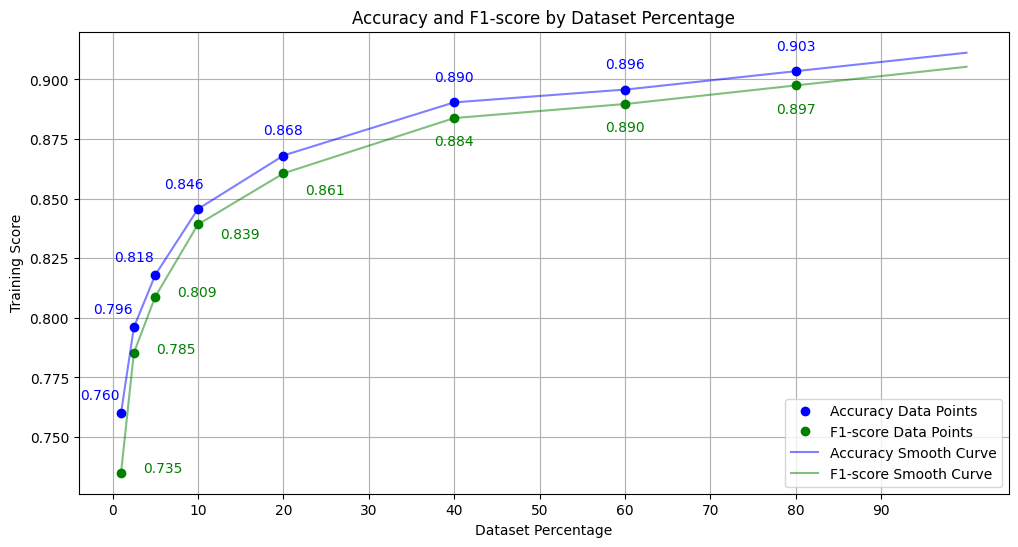

In [17]:
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

percentages = [1, 2.5, 5, 10, 20, 40, 60, 80]
new_percentages = np.linspace(1, 100, 500)

accuracy_spline = make_interp_spline(percentages, accuracy_percent_means, k=1)
f1_score_spline = make_interp_spline(percentages, f1_score_percent_means, k=1)

accuracy_smooth = accuracy_spline(new_percentages)
f1_score_smooth = f1_score_spline(new_percentages)

plt.figure(figsize=(12, 6))

plt.plot(percentages, accuracy_percent_means, 'o', color='blue', label='Accuracy Data Points')
plt.plot(percentages, f1_score_percent_means, 'o', color='green', label='F1-score Data Points')

accuracy_offsets = [(-15, 10), (-15, 10), (-15, 10), (-10, 15), (0, 15), (0, 15), (0, 15), (0, 15)]
f1_score_offsets = [(30, 0), (30, 0), (30, 0), (30, -10), (30, -15), (0, -20), (0, -20), (0, -20)]

for i, txt in enumerate(accuracy_percent_means):
    plt.annotate(f'{txt:.3f}', (percentages[i], accuracy_percent_means[i]), textcoords="offset points", xytext=accuracy_offsets[i], ha='center', color='blue')

for i, txt in enumerate(f1_score_percent_means):
    plt.annotate(f'{txt:.3f}', (percentages[i], f1_score_percent_means[i]), textcoords="offset points", xytext=f1_score_offsets[i], ha='center', color='green')

plt.plot(new_percentages, accuracy_smooth, '-', color='blue', label='Accuracy Smooth Curve', alpha=0.5, markersize=6)
plt.plot(new_percentages, f1_score_smooth, '-', color='green', label='F1-score Smooth Curve', alpha=0.5, markersize=6)

plt.xlabel('Dataset Percentage')
plt.ylabel('Training Score')
plt.title('Accuracy and F1-score by Dataset Percentage')
plt.legend(loc='lower right')
plt.grid(True)
plt.xticks(np.arange(0, 100, 10))
plt.savefig("./images/Accuracy_F1-score_Checkpoint_Plots.png", bbox_inches='tight')
plt.show()

### Accuracy Percentage and Training Time

In [10]:
def time_to_seconds(time_str):
    parts = time_str.split(':')
    if len(parts) == 2:
        m, s = map(int, parts)
        return m * 60 + s
    elif len(parts) == 3:
        h, m, s = map(int, parts)
        return h * 3600 + m * 60 + s

training_times_seconds = {
    '1_percent': np.array([time_to_seconds(t) for t in training_time_1_percent]),
    '2p5_percent': np.array([time_to_seconds(t) for t in training_time_2p5_percent]),
    '5_percent': np.array([time_to_seconds(t) for t in training_time_5_percent]),
    '10_percent': np.array([time_to_seconds(t) for t in training_time_10_percent]),
    '20_percent': np.array([time_to_seconds(t) for t in training_time_20_percent]),
    '40_percent': np.array([time_to_seconds(t) for t in training_time_40_percent]),
    '60_percent': np.array([time_to_seconds(t) for t in training_time_60_percent]),
    '80_percent': np.array([time_to_seconds(t) for t in training_time_80_percent]),
}

mean_training_times_seconds = np.array([np.mean(training_times_seconds[key]) for key in training_times_seconds.keys()])

def seconds_to_time(seconds):
    h = seconds // 3600
    m = (seconds % 3600) // 60
    s = seconds % 60
    return f'{int(h):02}:{int(m):02}:{int(s):02}'

mean_training_times_formatted = [seconds_to_time(t) for t in mean_training_times_seconds]

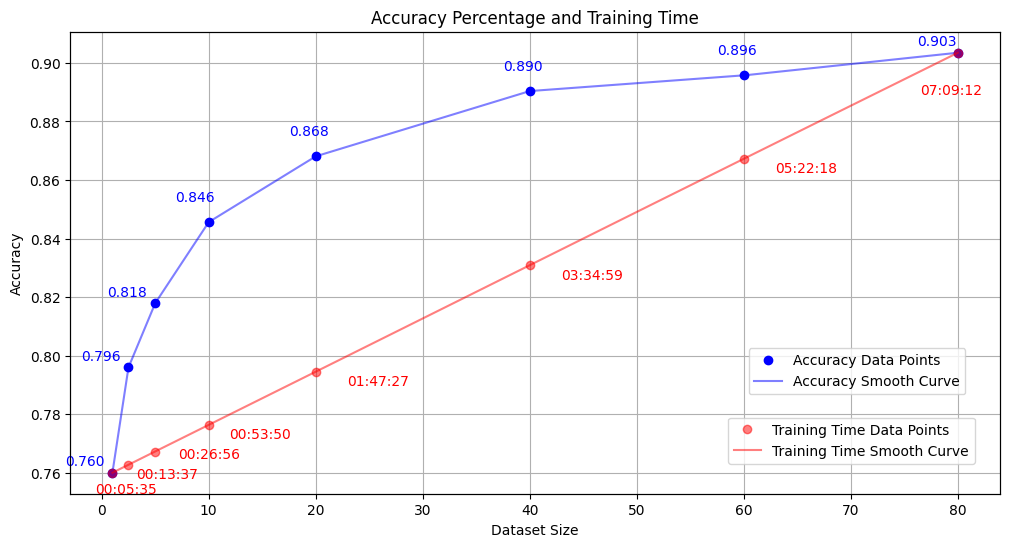

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

percentages = np.array([1, 2.5, 5, 10, 20, 40, 60, 80])
new_percentages = np.linspace(1, 80, 500)

accuracy_spline = make_interp_spline(percentages, accuracy_percent_means, k=1)
f1_score_spline = make_interp_spline(percentages, f1_score_percent_means, k=1)

accuracy_smooth = accuracy_spline(new_percentages)
f1_score_smooth = f1_score_spline(new_percentages)

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(percentages, accuracy_percent_means, 'o', color='blue', label='Accuracy Data Points')

accuracy_offsets = [(-20, 5), (-20, 5), (-20, 5), (-10, 15), (-5, 15), (-5, 15), (-5, 15), (-15, 5)]

for i, txt in enumerate(accuracy_percent_means):
    ax1.annotate(f'{txt:.3f}', (percentages[i], accuracy_percent_means[i]), textcoords="offset points", xytext=accuracy_offsets[i], ha='center', color='blue')

ax1.plot(new_percentages, accuracy_smooth, '-', color='blue', label='Accuracy Smooth Curve', alpha=0.5, markersize=6)

ax1.set_xlabel('Dataset Size')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy Percentage and Training Time')
ax1.legend(loc='lower right', bbox_to_anchor=(0.97, 0.2))
ax1.grid(True)
ax1.set_xticks(np.arange(0, 100, 10))

ax2 = ax1.twinx()
ax2.plot(percentages, mean_training_times_seconds, 'o', color='red', label='Training Time Data Points', alpha=0.5, markersize=6)
ax2.plot(new_percentages, make_interp_spline(percentages, mean_training_times_seconds, k=1)(new_percentages), '-', color='red', label='Training Time Smooth Curve', alpha=0.5, markersize=6)

time_offsets = [(10, -15), (28, -10), (39, -5), (37, -10), (45, -10), (45, -10), (45, -10), (-5, -30)]

for i, txt in enumerate(mean_training_times_formatted):
    ax2.annotate(txt, (percentages[i], mean_training_times_seconds[i]), textcoords="offset points", xytext=time_offsets[i], ha='center', color='red')

ax2.tick_params(axis='y', which='both', length=0, labelleft=False, labelright=False)

ax2.legend(loc='lower right', bbox_to_anchor=(0.98, 0.05))

plt.savefig("./images/Accuracy_TrainingTime_Checkpoint_Plots.png", bbox_inches='tight')
plt.show()

### Percentage Change

Percentage Change=((Mean of Group 2 − Mean of Group 1) / Mean of Group 1) x 100

In [6]:
accuracy_changes = {
    "1_to_2.5": ((accuracy_means["2.5_percent"] - accuracy_means["1_percent"]) / accuracy_means["1_percent"]) * 100,
    "2.5_to_5": ((accuracy_means["5_percent"] - accuracy_means["2.5_percent"]) / accuracy_means["2.5_percent"]) * 100,
    "5_to_10": ((accuracy_means["10_percent"] - accuracy_means["5_percent"]) / accuracy_means["5_percent"]) * 100,
    "10_to_20": ((accuracy_means["20_percent"] - accuracy_means["10_percent"]) / accuracy_means["10_percent"]) * 100,
    "20_to_40": ((accuracy_means["40_percent"] - accuracy_means["20_percent"]) / accuracy_means["20_percent"]) * 100,
    "40_to_60": ((accuracy_means["60_percent"] - accuracy_means["40_percent"]) / accuracy_means["40_percent"]) * 100,
    "60_to_80": ((accuracy_means["80_percent"] - accuracy_means["60_percent"]) / accuracy_means["60_percent"]) * 100
}

f1_score_changes = {
    "1_to_2.5": ((f1_score_means["2.5_percent"] - f1_score_means["1_percent"]) / f1_score_means["1_percent"]) * 100,
    "2.5_to_5": ((f1_score_means["5_percent"] - f1_score_means["2.5_percent"]) / f1_score_means["2.5_percent"]) * 100,
    "5_to_10": ((f1_score_means["10_percent"] - f1_score_means["5_percent"]) / f1_score_means["5_percent"]) * 100,
    "10_to_20": ((f1_score_means["20_percent"] - f1_score_means["10_percent"]) / f1_score_means["10_percent"]) * 100,
    "20_to_40": ((f1_score_means["40_percent"] - f1_score_means["20_percent"]) / f1_score_means["20_percent"]) * 100,
    "40_to_60": ((f1_score_means["60_percent"] - f1_score_means["40_percent"]) / f1_score_means["40_percent"]) * 100,
    "60_to_80": ((f1_score_means["80_percent"] - f1_score_means["60_percent"]) / f1_score_means["60_percent"]) * 100
}

accuracy_changes, f1_score_changes

({'1_to_2.5': 4.729523663669789,
  '2.5_to_5': 2.7552680745686273,
  '5_to_10': 3.3848191248588964,
  '10_to_20': 2.6552588633192165,
  '20_to_40': 2.566626278376918,
  '40_to_60': 0.6005254541566765,
  '60_to_80': 0.864463162012624},
 {'1_to_2.5': 6.836549138819333,
  '2.5_to_5': 2.999046704840919,
  '5_to_10': 3.74985009155233,
  '10_to_20': 2.5528244542617005,
  '20_to_40': 2.6947671277128613,
  '40_to_60': 0.6649470631259561,
  '60_to_80': 0.8795631341987502})

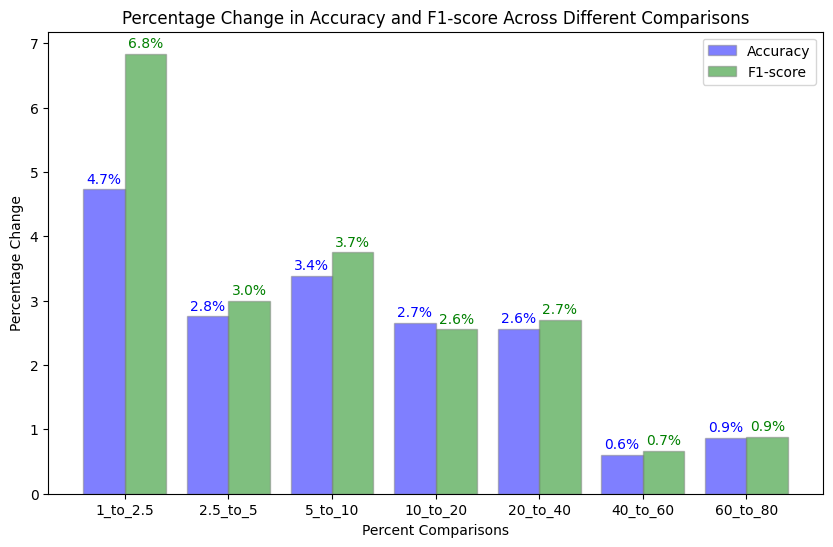

In [23]:
import matplotlib.pyplot as plt

categories = list(accuracy_changes.keys())
accuracy_percentage_changes = list(accuracy_changes.values())
f1_score_percentage_changes = list(f1_score_changes.values())

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.40

r1 = range(len(categories))
r2 = [x + bar_width for x in r1]

bars1 = ax.bar(r1, accuracy_percentage_changes, color='blue', width=bar_width, edgecolor='grey', label='Accuracy', alpha=0.5)
bars2 = ax.bar(r2, f1_score_percentage_changes, color='green', width=bar_width, edgecolor='grey', label='F1-score', alpha=0.5)

for i, txt in enumerate(accuracy_percentage_changes):
    ax.annotate(f'{txt:.1f}%', (r1[i], accuracy_percentage_changes[i] + 0.1), ha='center', color='blue')

for i, txt in enumerate(f1_score_percentage_changes):
    ax.annotate(f'{txt:.1f}%', (r2[i], f1_score_percentage_changes[i] + 0.1), ha='center', color='green')

ax.set_xlabel('Percent Comparisons')
ax.set_ylabel('Percentage Change')
ax.set_title('Percentage Change in Accuracy and F1-score Across Different Comparisons')
ax.set_xticks([r + bar_width/2 for r in range(len(categories))])
ax.set_xticklabels(categories)
ax.legend(loc='upper right')

plt.savefig("./images/PercentChange_Accuracy_F1score_Checkpoint_Plots.png", bbox_inches='tight')
plt.show()

## Accuracy

### t-test

In [14]:
import pandas as pd
from scipy import stats

accuracy_results = {
    '1%': accuracy_results_1_percent,
    '2.5%': accuracy_results_2p5_percent,
    '5%': accuracy_results_5_percent,
    '10%': accuracy_results_10_percent,
    '20%': accuracy_results_20_percent,
    '40%': accuracy_results_40_percent,
    '60%': accuracy_results_60_percent,
    '80%': accuracy_results_80_percent,
}

ttest_results = {
    'Comparison': [],
    't-statistic': [],
    'p-value': []
}

comparisons = [
    ('1%', '2.5%'),
    ('2.5%', '5%'),
    ('5%', '10%'),
    ('10%', '20%'),
    ('20%', '40%'),
    ('40%', '60%'),
    ('60%', '80%'),
]

for comp in comparisons:
    group1, group2 = comp
    t_stat, p_value = stats.ttest_ind(accuracy_results[group1], accuracy_results[group2])
    ttest_results['Comparison'].append(f"{group1} to {group2}")
    ttest_results['t-statistic'].append(t_stat)
    ttest_results['p-value'].append(p_value)

df_ttest_accuracy_results = pd.DataFrame(ttest_results)

print(df_ttest_accuracy_results)

   Comparison  t-statistic   p-value
0  1% to 2.5%    -6.410152  0.000207
1  2.5% to 5%    -7.335572  0.000081
2   5% to 10%    -6.153045  0.000273
3  10% to 20%    -3.056411  0.015668
4  20% to 40%    -3.430685  0.008946
5  40% to 60%    -1.628451  0.142079
6  60% to 80%    -2.143683  0.064406


In [15]:
for index, row in df_ttest_accuracy_results.iterrows():
    comparison = row['Comparison']
    p_value_ttest = row['p-value']
    if p_value_ttest < alpha:
        print(f"Reject the null hypothesis for the t-test for {comparison}: The means are significantly different.")
    else:
        print(f"Fail to reject the null hypothesis for the t-test for {comparison}: The means are not significantly different.")

Reject the null hypothesis for the t-test for 1% to 2.5%: The means are significantly different.
Reject the null hypothesis for the t-test for 2.5% to 5%: The means are significantly different.
Reject the null hypothesis for the t-test for 5% to 10%: The means are significantly different.
Reject the null hypothesis for the t-test for 10% to 20%: The means are significantly different.
Reject the null hypothesis for the t-test for 20% to 40%: The means are significantly different.
Fail to reject the null hypothesis for the t-test for 40% to 60%: The means are not significantly different.
Fail to reject the null hypothesis for the t-test for 60% to 80%: The means are not significantly different.


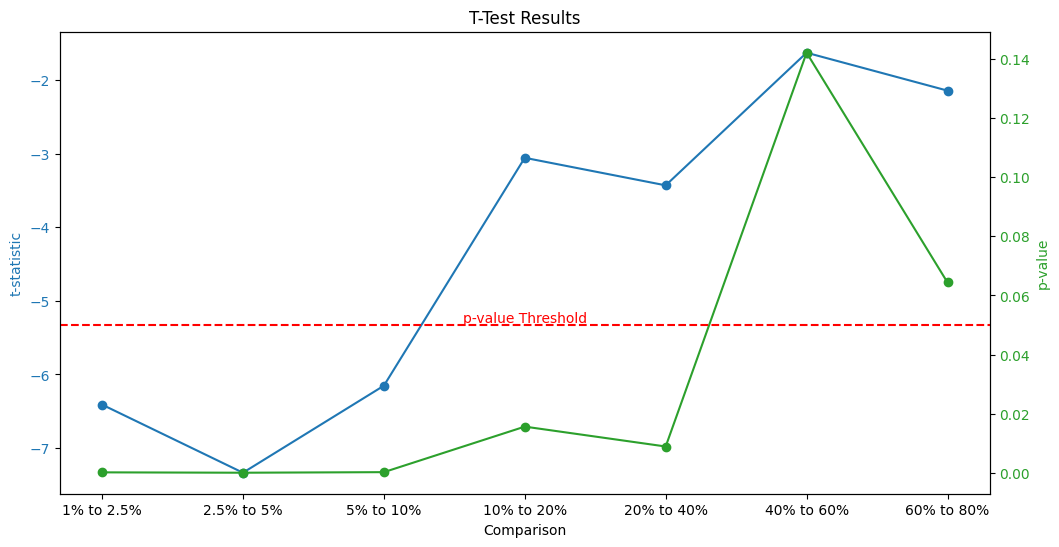

In [16]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Comparison')
ax1.set_ylabel('t-statistic', color=color)
ax1.plot(df_ttest_accuracy_results['Comparison'], df_ttest_accuracy_results['t-statistic'], marker='o', color=color, linestyle='-')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('T-Test Results')

ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('p-value', color=color)
ax2.plot(df_ttest_accuracy_results['Comparison'], df_ttest_accuracy_results['p-value'], marker='o', color=color, linestyle='-')
ax2.tick_params(axis='y', labelcolor=color)
ax2.axhline(y=0.05, color='r', linestyle='--')
ax2.text(0.5, 0.05, 'p-value Threshold', color='r', ha='center', va='bottom', transform=ax2.get_yaxis_transform())

plt.show()

## F1-Score

### t-test

In [20]:
import pandas as pd
from scipy import stats

accuracy_results = {
    '1%': f1_score_results_1_percent,
    '2.5%': f1_score_results_2p5_percent,
    '5%': f1_score_results_5_percent,
    '10%': f1_score_results_10_percent,
    '20%': f1_score_results_20_percent,
    '40%': f1_score_results_40_percent,
    '60%': f1_score_results_60_percent,
    '80%': f1_score_results_80_percent,
}

ttest_results = {
    'Comparison': [],
    't-statistic': [],
    'p-value': []
}

comparisons = [
    ('1%', '2.5%'),
    ('2.5%', '5%'),
    ('5%', '10%'),
    ('10%', '20%'),
    ('20%', '40%'),
    ('40%', '60%'),
    ('60%', '80%'),
]

for comp in comparisons:
    group1, group2 = comp
    t_stat, p_value = stats.ttest_ind(accuracy_results[group1], accuracy_results[group2])
    ttest_results['Comparison'].append(f"{group1} to {group2}")
    ttest_results['t-statistic'].append(t_stat)
    ttest_results['p-value'].append(p_value)

df_ttest_f1_score_results = pd.DataFrame(ttest_results)

print(df_ttest_f1_score_results)

   Comparison  t-statistic   p-value
0  1% to 2.5%    -8.876671  0.000021
1  2.5% to 5%    -8.940169  0.000019
2   5% to 10%    -7.117024  0.000100
3  10% to 20%    -2.907754  0.019657
4  20% to 40%    -3.544683  0.007568
5  40% to 60%    -1.752115  0.117853
6  60% to 80%    -2.124906  0.066317


In [21]:
for index, row in df_ttest_f1_score_results.iterrows():
    comparison = row['Comparison']
    p_value_ttest = row['p-value']
    if p_value_ttest < alpha:
        print(f"Reject the null hypothesis for the t-test for {comparison}: The means are significantly different.")
    else:
        print(f"Fail to reject the null hypothesis for the t-test for {comparison}: The means are not significantly different.")

Reject the null hypothesis for the t-test for 1% to 2.5%: The means are significantly different.
Reject the null hypothesis for the t-test for 2.5% to 5%: The means are significantly different.
Reject the null hypothesis for the t-test for 5% to 10%: The means are significantly different.
Reject the null hypothesis for the t-test for 10% to 20%: The means are significantly different.
Reject the null hypothesis for the t-test for 20% to 40%: The means are significantly different.
Fail to reject the null hypothesis for the t-test for 40% to 60%: The means are not significantly different.
Fail to reject the null hypothesis for the t-test for 60% to 80%: The means are not significantly different.


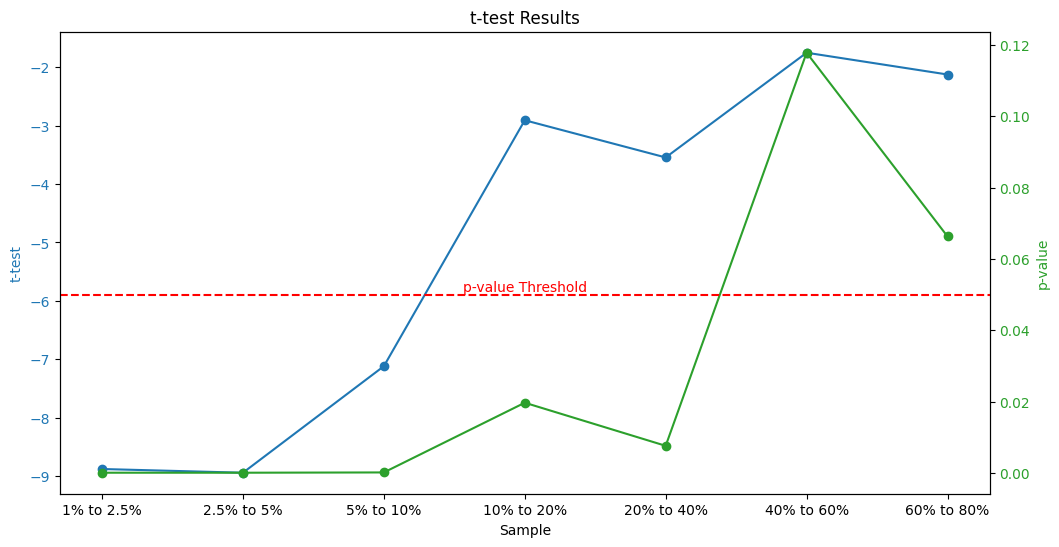

In [22]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Sample')
ax1.set_ylabel('t-test', color=color)
ax1.plot(df_ttest_f1_score_results['Comparison'], df_ttest_f1_score_results['t-statistic'], marker='o', color=color, linestyle='-')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('t-test Results')

ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('p-value', color=color)
ax2.plot(df_ttest_f1_score_results['Comparison'], df_ttest_f1_score_results['p-value'], marker='o', color=color, linestyle='-')
ax2.tick_params(axis='y', labelcolor=color)
ax2.axhline(y=0.05, color='r', linestyle='--')
ax2.text(0.5, 0.05, 'p-value Threshold', color='r', ha='center', va='bottom', transform=ax2.get_yaxis_transform())

plt.show()

### All models and results

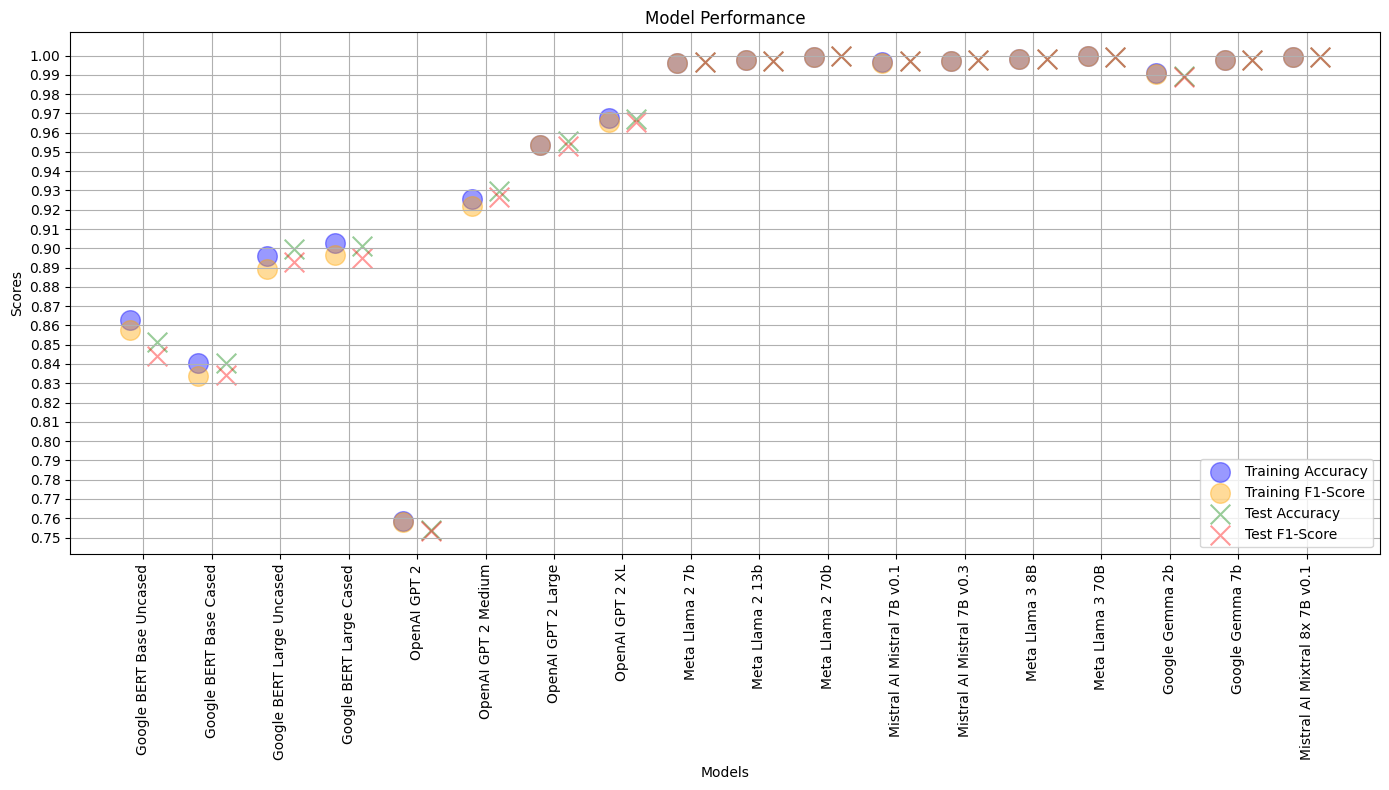

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = {
    "Model": ["Google BERT Base Uncased", "Google BERT Base Cased", "Google BERT Large Uncased", 
              "Google BERT Large Cased", "OpenAI GPT 2", "OpenAI GPT 2 Medium", "OpenAI GPT 2 Large", 
              "OpenAI GPT 2 XL", "Meta Llama 2 7b", "Meta Llama 2 13b", "Meta Llama 2 70b", 
              "Mistral AI Mistral 7B v0.1", "Mistral AI Mistral 7B v0.3", "Meta Llama 3 8B", 
              "Meta Llama 3 70B", "Google Gemma 2b", "Google Gemma 7b", "Mistral AI Mixtral 8x 7B v0.1"],
    "Training Accuracy": [0.862696, 0.840344, 0.896016, 0.902957, 0.758712, 0.925448, 0.953353, 
                          0.967375, 0.996252, 0.997779, 0.999445, 0.996390, 0.997085, 0.998334, 
                          0.999722, 0.991115, 0.997779, 0.999445],
    "Training F1-Score": [0.857880, 0.833650, 0.889461, 0.896661, 0.758301, 0.922152, 0.953353, 
                          0.965559, 0.996039, 0.997655, 0.999414, 0.996187, 0.996921, 0.998240, 
                          0.999707, 0.990305, 0.997653, 0.999414],
    "Test Accuracy":     [0.851173, 0.840344, 0.899486, 0.901013, 0.753853, 0.929613, 0.955574, 
                          0.967236, 0.996668, 0.997085, 0.999722, 0.997085, 0.997640, 0.998195, 
                          0.999445, 0.989588, 0.997918, 0.999167],
    "Test F1-Score":     [0.844304, 0.834288, 0.893158, 0.894774, 0.753639, 0.926404, 0.952884, 
                          0.965410, 0.996483, 0.996924, 0.999707, 0.996924, 0.997510, 0.998096, 
                          0.999414, 0.989005, 0.997801, 0.999121]
}

df = pd.DataFrame(data)

x_pos = range(len(df))
x_pos_training = [x - 0.2 for x in x_pos]
x_pos_test = [x + 0.2 for x in x_pos]

plt.figure(figsize=(14, 8))

plt.scatter(x_pos_training, df["Training Accuracy"], color='blue', label='Training Accuracy', s=200, alpha=0.4)
plt.scatter(x_pos_training, df["Training F1-Score"], color='orange', label='Training F1-Score', s=200, alpha=0.4)

plt.scatter(x_pos_test, df["Test Accuracy"], color='green', label='Test Accuracy', marker='x', s=200, alpha=0.4)
plt.scatter(x_pos_test, df["Test F1-Score"], color='red', label='Test F1-Score', marker='x', s=200, alpha=0.4)

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance')
plt.xticks(x_pos, df["Model"], rotation=90)
plt.yticks(np.arange(0.75, 1.01, 0.01))  # Setting y-axis ticks from 0.7 to 1.0 with an interval of 0.01
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()

plt.savefig("./images/Model_Performance_Plots.png")
plt.show()

### All Models and Parameter Size

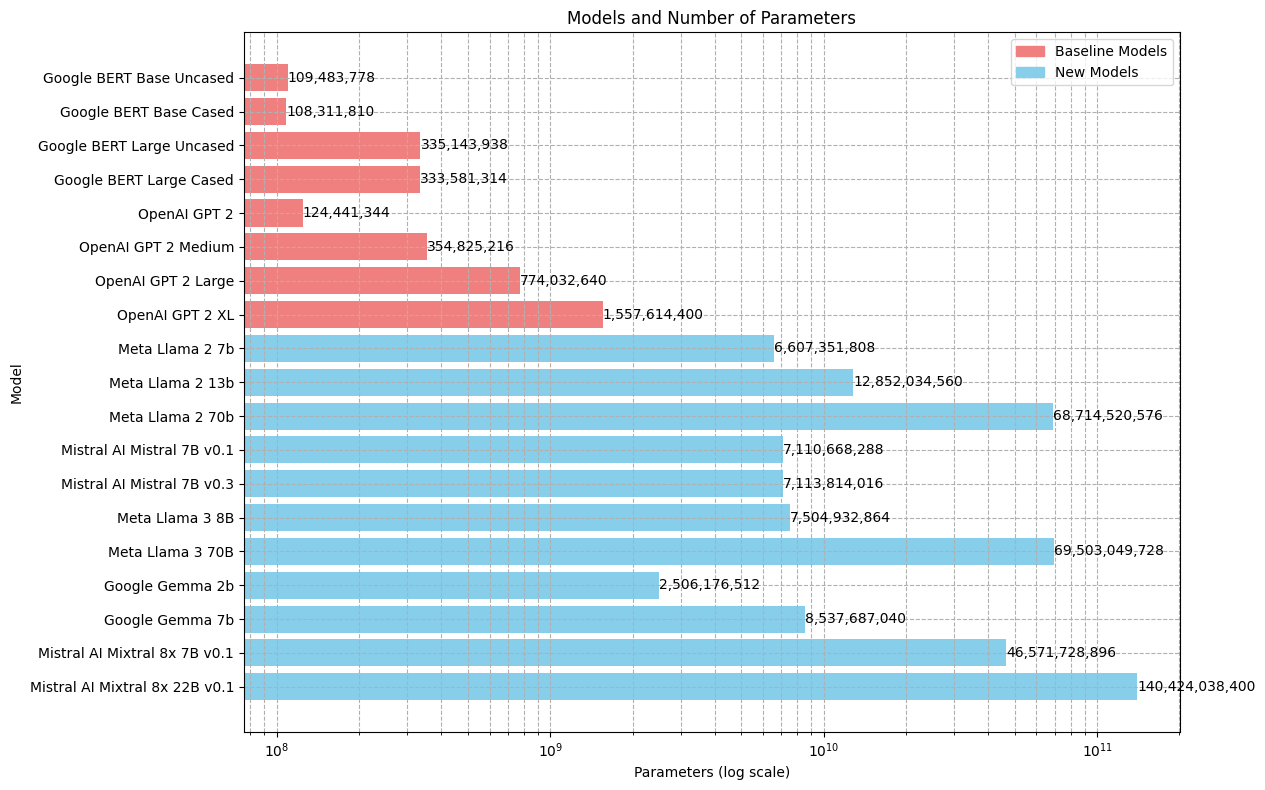

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    "Model": [
        "Google BERT Base Uncased", "Google BERT Base Cased", "Google BERT Large Uncased",
        "Google BERT Large Cased", "OpenAI GPT 2", "OpenAI GPT 2 Medium", "OpenAI GPT 2 Large",
        "OpenAI GPT 2 XL", "Meta Llama 2 7b", "Meta Llama 2 13b", "Meta Llama 2 70b",
        "Mistral AI Mistral 7B v0.1", "Mistral AI Mistral 7B v0.3", "Meta Llama 3 8B",
        "Meta Llama 3 70B", "Google Gemma 2b", "Google Gemma 7b", "Mistral AI Mixtral 8x 7B v0.1",
        "Mistral AI Mixtral 8x 22B v0.1"
    ],
    "Parameters": [
        109483778, 108311810, 335143938, 333581314, 124441344, 354825216, 774032640, 1557614400,
        6607351808, 12852034560, 68714520576, 7110668288, 7113814016, 7504932864, 69503049728,
        2506176512, 8537687040, 46571728896, 140424038400
    ]
}

df = pd.DataFrame(data)
df_inverted = df.iloc[::-1]

half_index = df_inverted[df_inverted['Model'] == 'OpenAI GPT 2 XL'].index[0]
colors = ['skyblue'] * (half_index + 4) + ['lightcoral'] * (len(df_inverted) - (half_index + 4))

plt.figure(figsize=(12, 8))
bars = plt.barh(df_inverted['Model'], df_inverted['Parameters'], color=colors)
plt.xlabel('Parameters (log scale)')
plt.ylabel('Model')
plt.title('Models and Number of Parameters')
plt.xscale('log')
plt.grid(True, which="both", ls="--")
plt.tight_layout()

for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2,
             f'{width:,.0f}', va='center')

import matplotlib.patches as mpatches
baseline_patch = mpatches.Patch(color='skyblue', label='New Models')
new_patch = mpatches.Patch(color='lightcoral', label='Baseline Models')
plt.legend(handles=[new_patch, baseline_patch])

plt.savefig("./images/Model_Number_Parameters_Plots.png")
plt.show()

In [23]:
project_name = "praxis-dataset-percent"
file_name = f"{project_name}.ipynb"
html_file_name = f"{file_name.replace('.ipynb', '.html')}"

command = f"jupyter nbconvert '{file_name}' --to html --output-dir './html' --output '{html_file_name}'"
get_ipython().system(command)

[NbConvertApp] Converting notebook praxis-dataset-percent-v7.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 8 image(s).
[NbConvertApp] Writing 1113472 bytes to html/praxis-dataset-percent-v7.html
